In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cv
import pandas as pd

# Data Analysis: Categorization

Given the sample counts of ~4000 genes across ~200 cells, we applied the 'refined threshold' method to each gene to compute bounds (interval estimates) on parameters in the bursting model.

These interval estimates can vary greatly: some are very close to geometric, some are uninformative, many have all 0 lower bounds and some genes simply lead to infeasible LP systems (suggesting the data does not fit the model).

To get a better picture of the data we wish to classify genes into categories based on the various cases of their bounds:

# Bounds

Load in the computed bounds: each row of bounds corresponds to the gene in the original dataset. The columns are the parameters of the reaction system that are estimated.

Each entry is a list of [lower bound, upper bound, lb LP status, ub LP status], or NaN if the parameter was not estimated for that gene.

In [2]:
data = pd.read_csv("SS3_c57_UMIs_concat_bounds.csv", index_col="Unnamed: 0")
data.head()

C:\Users\willi\AppData\Local\Temp\ipykernel_26732\4180833934.py:1: DtypeWarning: Columns (145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("SS3_c57_UMIs_concat_bounds.csv", index_col="Unnamed: 0")


,k0,k1,mu_1,mu_2,mu_3,mu_4,mu_5,mu_6,mu_7,mu_8,...,mu_278,mu_279,mu_280,mu_281,mu_282,mu_283,mu_284,mu_285,mu_286,mu_287
0,1,"[0.7931034482720015, 2.0578571428580195, 'opti...","[-2.8743155645824184e-14, 1.0000000000016618, ...","[-2.653118833851089e-14, 1.000000000002961, 'o...","[-2.277233585339472e-14, 1.00000000000185, 'op...","[-2.0845291320012502e-14, 1.0000000000013007, ...","[-1.78409258333694e-14, 1.000000000000075, 'op...","[-1.6684337924484522e-14, 0.6713085690214184, ...","[-1.8331054566664728e-14, 0.6713085690084142, ...","[-2.080683345818881e-14, 0.6713085690264122, '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"[0.9687499999987329, 2.175000000027888, 'optim...","[-4.4302975334047706e-13, 0.7822580645270424, ...","[-5.764389656699711e-13, 1.0000000000025557, '...","[-1.2240675092646862e-14, 1.0000000000007392, ...","[-1.6441858083192303e-14, 1.0000000000003637, ...","[-2.1362929482612252e-14, 1.0000000000002727, ...","[-2.4189833960325182e-14, 1.0000000000006157, ...","[-2.551215532510408e-14, 1.0000000000062719, '...","[-2.642644212632816e-14, 1.000000000002613, 'o...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"[0.14285714285622997, 1.9583333333413973, 'opt...","[-1.5826038110619332e-15, 1.0000000000001716, ...","[-1.28875407477881e-15, 1.0000000000032607, 'o...","[-1.5144922004226716e-15, 1.0000000000029117, ...","[-1.733783730464011e-15, 1.0000000000029936, '...","[-1.6062043160786174e-15, 1.0000000000024472, ...","[-1.3349158541399215e-15, 1.0000000000019278, ...","[-1.2279648171697277e-15, 1.0000000000017242, ...","[-1.1330565476099194e-15, 1.0000000000019413, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"[None, None, 'infeasible', 'infeasible']","[None, None, 'infeasible', 'infeasible']","[None, None, 'infeasible', 'infeasible']",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"[1.232558139526332, 2.541666666669051, 'optima...","[-6.177734572025108e-14, 0.6950416849532361, '...","[-8.260653416551917e-14, 1.0000000000059892, '...","[-1.240861725419763e-13, 1.000000000004966, 'o...","[-1.2663218123212162e-13, 1.0000000000052542, ...","[-1.1012909576197698e-13, 1.0000000000000797, ...","[-7.009955766795354e-14, 0.9120370370404516, '...","[-7.342345014315811e-14, 0.9120370370448645, '...","[-7.164945570328284e-14, 0.7490842490865798, '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Categories:

### Infeasible

An easy category to identify are the genes where the LP's for all parameters are infeasible:

For a given gene the linear programs to minimise and maximise parameters all have the same constraints, differing only in objective function, so if one LP is infeasible then all are. In an infeasible situation the 'refined threshold' method drops equations of Qp = 0 from the constraints one by one until the LP is feasible, or there are no constraints (stop at 2 rows). This leads to a row of [None, None, infeasible, infeasible] estimates for parameters $ k_1 , \mu_1 $ and $ \mu_2 $

This suggests that the data (counts of transcripts produced by the gene) does not fit the bursty reaction model, either because the gene follows a different reaction system, or the data is poor/not representative (perhaps due to low efficiency in collection methods).

In [3]:
# boolean mask over k1 column: look for solution lists with infeasible in
mask_infeasible = data.k1.apply(lambda x: 'infeasible' in x)
# apply mask to select these rows
infeasible_genes = data[mask_infeasible]
# count number of genes
inf_num = infeasible_genes.shape[0]
inf_per = round(100 * inf_num / data.shape[0], 2)
print(f"{inf_num} infeasible genes, {inf_per}% of the data.")

168 infeasible genes, 4.34% of the data.


### Feasible:

Remove these genes to give dataset of feasible genes for further categorization:

In [4]:
# select feasible rows (~mask = logical not of mask)
feasible_genes = data[~mask_infeasible]
# count number of genes
feas_num = feasible_genes.shape[0]
feas_per = round(100 * feas_num / data.shape[0], 2)
print(f"{feas_num} feasible genes, {feas_per}% of the data.")

3707 feasible genes, 95.66% of the data.


### Zero lower bounds

When testing methods we saw that most bounds seemed to have non-informative lower bounds of 0 on almost all distribution parameters $ \mu_k $. It's unclear why this is the case, compared to the generally informative upper bounds that are < 1.

Identify the % of genes that have lower bounds of 0 on all $ \mu_k $'s:

(NOTE: work with feasible genes here)

In [19]:
from ast import literal_eval

def zero_lb(row):
    """Boolean indicator if all lower bounds ~ 0 (with a tolerance)"""
    # take mu_k columns: discard k0 and k1 columns
    row = row[2:]
    # loop over columns
    for bounds in row:
        # if not nan (not estimated)
        if pd.notnull(bounds):
            # convert string to list: take lower bound
            lb = literal_eval(bounds)[0]
            # if not None (infeasible, no bounds)
            if lb:
                # if lb sufficiently large: return False (non-zero lb found)
                if lb > 10**(-2):
                    return False
            # if None: infeasible, no bounds: question doesn't make sense
            else:
                return np.nan
    # no sufficiently large lb: return True (all lb zero)
    return True

# boolean mask of rows (of feasible genes)
mask_zero = feasible_genes.apply(zero_lb, axis='columns')
# apply mask
zero_lb_genes = feasible_genes[mask_zero]
# count number of genes
zero_lb_num = zero_lb_genes.shape[0]
zero_lb_per = round(100 * zero_lb_num / feas_num, 2)
print(f"{zero_lb_num} genes with zero lower bounds, {zero_lb_per}% of the data.")
# show
zero_lb_genes.head()

3303 genes with zero lower bounds, 89.1% of the data.


,k0,k1,mu_1,mu_2,mu_3,mu_4,mu_5,mu_6,mu_7,mu_8,...,mu_278,mu_279,mu_280,mu_281,mu_282,mu_283,mu_284,mu_285,mu_286,mu_287
0,1,"[0.7931034482720015, 2.0578571428580195, 'opti...","[-2.8743155645824184e-14, 1.0000000000016618, ...","[-2.653118833851089e-14, 1.000000000002961, 'o...","[-2.277233585339472e-14, 1.00000000000185, 'op...","[-2.0845291320012502e-14, 1.0000000000013007, ...","[-1.78409258333694e-14, 1.000000000000075, 'op...","[-1.6684337924484522e-14, 0.6713085690214184, ...","[-1.8331054566664728e-14, 0.6713085690084142, ...","[-2.080683345818881e-14, 0.6713085690264122, '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"[0.9687499999987329, 2.175000000027888, 'optim...","[-4.4302975334047706e-13, 0.7822580645270424, ...","[-5.764389656699711e-13, 1.0000000000025557, '...","[-1.2240675092646862e-14, 1.0000000000007392, ...","[-1.6441858083192303e-14, 1.0000000000003637, ...","[-2.1362929482612252e-14, 1.0000000000002727, ...","[-2.4189833960325182e-14, 1.0000000000006157, ...","[-2.551215532510408e-14, 1.0000000000062719, '...","[-2.642644212632816e-14, 1.000000000002613, 'o...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"[0.14285714285622997, 1.9583333333413973, 'opt...","[-1.5826038110619332e-15, 1.0000000000001716, ...","[-1.28875407477881e-15, 1.0000000000032607, 'o...","[-1.5144922004226716e-15, 1.0000000000029117, ...","[-1.733783730464011e-15, 1.0000000000029936, '...","[-1.6062043160786174e-15, 1.0000000000024472, ...","[-1.3349158541399215e-15, 1.0000000000019278, ...","[-1.2279648171697277e-15, 1.0000000000017242, ...","[-1.1330565476099194e-15, 1.0000000000019413, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"[1.232558139526332, 2.541666666669051, 'optima...","[-6.177734572025108e-14, 0.6950416849532361, '...","[-8.260653416551917e-14, 1.0000000000059892, '...","[-1.240861725419763e-13, 1.000000000004966, 'o...","[-1.2663218123212162e-13, 1.0000000000052542, ...","[-1.1012909576197698e-13, 1.0000000000000797, ...","[-7.009955766795354e-14, 0.9120370370404516, '...","[-7.342345014315811e-14, 0.9120370370448645, '...","[-7.164945570328284e-14, 0.7490842490865798, '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,"[0.3777777777755056, 1.500000000005642, 'optim...","[-7.426509106112707e-15, 1.0000000000008493, '...","[-8.693353573328164e-15, 1.0000000000007552, '...","[-8.447846175274252e-15, 1.0000000000006448, '...","[-8.407338874921894e-15, 1.0000000000006255, '...","[-8.347259215008451e-15, 1.0000000000006182, '...","[-8.2815083778816e-15, 1.000000000000608, 'opt...","[-8.200653785081936e-15, 1.0000000000015417, '...","[-8.23457372970321e-15, 1.0000000000011056, 'o...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Non-zero lower bounds

Look at some plots of distributions for genes with non-zero lower bounds:

In [6]:
# dataframe of non-zero lower bounds
non_zero_lb_genes = feasible_genes[-mask_zero]
non_zero_lb_genes.head()

,k0,k1,mu_1,mu_2,mu_3,mu_4,mu_5,mu_6,mu_7,mu_8,...,mu_278,mu_279,mu_280,mu_281,mu_282,mu_283,mu_284,mu_285,mu_286,mu_287
23,1,"[0.6153846153139756, 1.3541666666668488, 'opti...","[0.11346153841998578, 1.0000000000007816, 'opt...","[-2.7961905580251037e-14, 0.8865384615461047, ...","[-2.2572475386767058e-14, 0.8865384615636797, ...","[-1.77713214980845e-14, 0.8865384615595082, 'o...","[-1.7316863190034445e-14, 0.6186655405680679, ...","[-1.757221010065836e-14, 0.6186655405435069, '...","[-1.7852640563782622e-14, 0.6186655405550125, ...","[-1.663285883273567e-14, 0.618665540575892, 'o...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1,"[0.921874999981046, 1.5423728813583926, 'optim...","[0.5636058856375835, 1.0000000000022669, 'opti...","[-5.466695465284957e-14, 0.43639411437033565, ...","[-5.645229649982109e-14, 0.43639411438873077, ...","[-5.600168396599713e-14, 0.4363941143941552, '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1,"[0.8488372093019368, 1.7586206896558307, 'opti...","[0.29276538201354124, 1.0000000000016267, 'opt...","[-3.743548094077469e-12, 0.707234617992157, 'o...","[-4.23081053682716e-12, 0.509350340505399, 'op...","[-3.756281175032841e-12, 0.5093503405669544, '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,1,"[0.9189189189164295, 1.9796875000073713, 'opti...","[0.25513022886427283, 1.0000000000065856, 'opt...","[-1.449937614494535e-13, 0.6381966037777086, '...","[-1.6098071974568468e-13, 0.7395997203342575, ...","[-1.6119892209912815e-13, 0.7395997203434819, ...","[-1.3605831139753072e-13, 0.7395997203332977, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1,"[1.2499999993575908, 1.6333333333605253, 'opti...","[0.765306122444942, 1.0000000000014055, 'optim...","[-1.2299231217157897e-12, 0.20043572989310726,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def plot_dist(bounds):
    # store
    labels = []
    lower = []
    upper = []
    # loop over dist
    for m in range(1, 288):
        bound = bounds[f"mu_{m}"]
        # if not null: i.e has an estimate
        if pd.notna(bound):
            # convert from string to list
            bound = literal_eval(bounds[f"mu_{m}"])
            # add values
            labels.append(f"mu_{m}")
            lower.append(bound[0])
            upper.append(bound[1])
    # plot
    plt.plot(labels, upper, label = "Upper bound")
    plt.plot(labels, lower, label = "Lower bound")
    plt.title("LP Bounds on birth distribution")
    plt.ylabel("Probability")
    plt.xlabel("Birth distribution")
    plt.legend()
    plt.show()

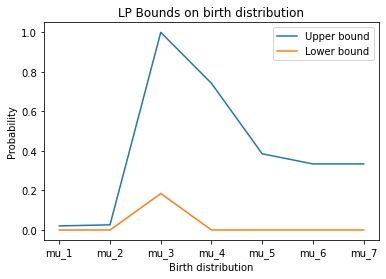

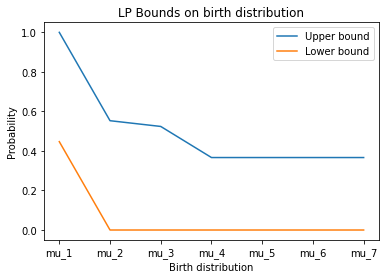

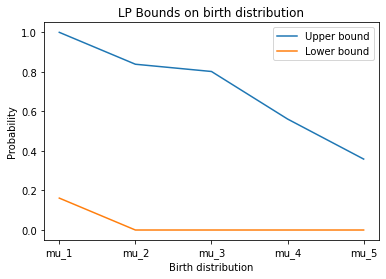

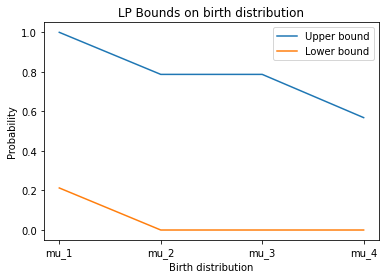

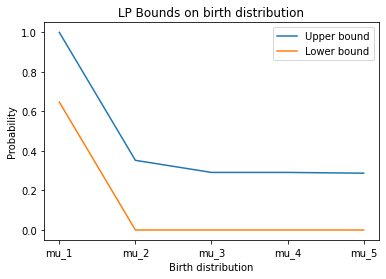

In [8]:
rng = np.random.default_rng(88)
for i in rng.choice(non_zero_lb_genes.shape[0], 5):
    bounds = non_zero_lb_genes.iloc[i]
    plot_dist(bounds)

### Decreasing/Increasing upper bounds

From the above examples of genes with non-zero lower bounds we see that the upper bounds of the distribution tend to decrease, but some (like the 1st) do not.

We might like to know if a geometric distribution would be a good model for the birth/bursting behaviour of the gene, which we could do by seeing if the dist. would 'fit' inbetween the interval bounds. This can be roughly found by seeing if the upper bound decreases along the distribution.

Find the genes in the dataset whose upper bounds are decreasing, or increasing:

Note:
Weakly decreasing $ x_1 < x_2 \implies f(x_1) \ge f(x_2) $ and strictly decreasing $ x_1 < x_2 \implies f(x_1) < f(x_2) $ (or increasing) give the same result here, since the numerical solutions to the LP's vary slightly even with identical constraints, so the upper bounds are never exactly constant, even when they are realistically e.g. all 1.

In [20]:
from ast import literal_eval

def monotone_ub(row, decreasing=True):
    """
    Boolean indicator if upper bounds of dist. are montone (weakly)

    row: row of data containing lists of bounds on parameters + nan values
    decreasing:
        (True) return bool of whether upper bounds are weakly decreasing
        (False) return bool of whether upper bounds are weakly increasing
    """
    if decreasing:
        # arbitrary high value
        ub_prev = 10
    else:
        # arbitrarily low value
        ub_prev = -10
    # take mu_k columns: discard k0 and k1 columns
    row = row[2:]
    # loop over columns
    for bounds in row:
        # if not nan (not estimated)
        if pd.notnull(bounds):
            # convert string to list: take upper bound
            ub = literal_eval(bounds)[1]
            # if not None (infeasible, no bounds)
            if ub:
                # decreasing ub: if ub > ub_prev, return False (not decreasing)
                if ub > ub_prev and decreasing:
                    return False
                # increasing ub: if ub < ub_prev, return False (not increasing)
                elif ub < ub_prev and not decreasing:
                    return False
                # otherwise, update ub_prev to new value
                else:
                    ub_prev = ub
            # if None: infeasible, no bounds: question doesn't make sense
            else:
                return np.nan
    # no problems found: return True
    return True

# boolean mask of rows (of feasible genes)
mask_dec = feasible_genes.apply(monotone_ub, args=(True,), axis='columns')
mask_inc = feasible_genes.apply(monotone_ub, args=(False,), axis='columns')
# apply mask
dec_ub_genes = feasible_genes[mask_dec]
inc_ub_genes = feasible_genes[mask_inc]
# count number of genes
dec_num = dec_ub_genes.shape[0]
inc_num = inc_ub_genes.shape[0]
dec_per = round(100 * dec_num / feas_num, 2)
inc_per = round(100 * inc_num / feas_num, 2)
print(f"{dec_num} genes with all decreasing upper bounds, {dec_per}% of the feasible data.")
print(f"{inc_num} genes with all increasing upper bounds, {inc_per}% of the feasible data.")

198 genes with all decreasing upper bounds, 5.34% of the feasible data.
194 genes with all increasing upper bounds, 5.23% of the feasible data.


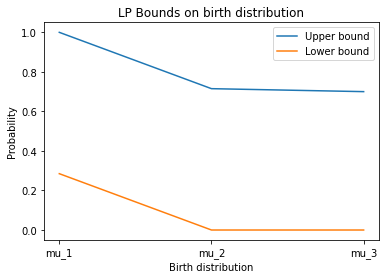

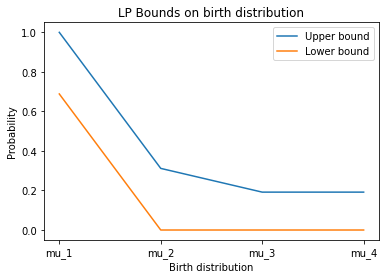

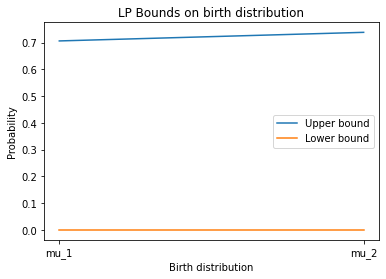

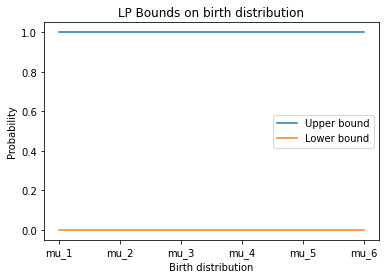

In [10]:
rng = np.random.default_rng(30)
for i in rng.choice(dec_ub_genes.shape[0], 2):
    bounds = dec_ub_genes.iloc[i]
    plot_dist(bounds)
for i in rng.choice(inc_ub_genes.shape[0], 2):
    bounds = inc_ub_genes.iloc[i]
    plot_dist(bounds)

See that most of the increasing bounds are simply (0,1) bounds. However, there are a few that have more informative increasing bounds.

### Tight/Loose bounds

For each gene calculate the average width of bounds as a measure of how 'tight' / 'loose' the bounds are. Given a threshold we can then select those that have average width below this value, seeing how this changes.

In [21]:
def average_width(row, threshold=0.5, bool=True):
    """
    Calculate average width of dist. interval bounds
    Return bool of average < threshold, or just average if bool = False
    """
    # take mu_k columns: discard k0 and k1 columns
    row = row[2:]
    widths = []
    # loop over columns
    for bounds in row:
        # if not nan (not estimated)
        if pd.notnull(bounds):
            # convert string to list: take upper bound
            bound = literal_eval(bounds)
            lb = bound[0]
            ub = bound[1]
            # if not None (infeasible, no bounds)
            if ub:
                widths.append(ub - lb)
            # if None: infeasible, no bounds: question doesn't make sense
            else:
                return np.nan
    avg = sum(widths) / len(widths)
    if bool:
        return avg < threshold
    else:
        return avg

# boolean mask of rows (of feasible genes)
threshold = 0.5
mask_width = feasible_genes.apply(average_width, args=(threshold,), axis='columns')
# apply mask
tight_genes = feasible_genes[mask_width]
# count number of genes
tight_num = tight_genes.shape[0]
tight_per = round(100 * tight_num / feas_num, 2)
print(f"{tight_num} genes with average width < {threshold} , {tight_per}% of the feasible data.")

194 genes with average width < 0.5 , 5.23% of the feasible data.


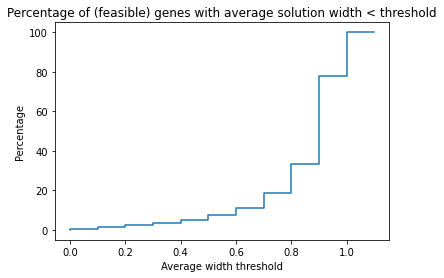

In [12]:
# range of widths
widths = [x/10 for x in range(0,12)]
width_num = []
# threshold based on each width
for threshold in widths:
    # threshold of widths
    mask_width = feasible_genes.apply(average_width, args=(threshold,), axis='columns')
    # apply mask
    tight_genes = feasible_genes[mask_width]
    # count number of genes
    tight_num = tight_genes.shape[0]
    tight_per = round(100 * tight_num / feas_num, 2)
    width_num.append(tight_per)
# plot
plt.step(widths, width_num)
plt.title("Percentage of (feasible) genes with average solution width < threshold")
plt.xlabel("Average width threshold")
plt.ylabel("Percentage")
plt.show()

[Text(0.5, 0, 'Average width <0.99  of distribution bounds'),
 Text(0, 0.5, 'Frequency')]

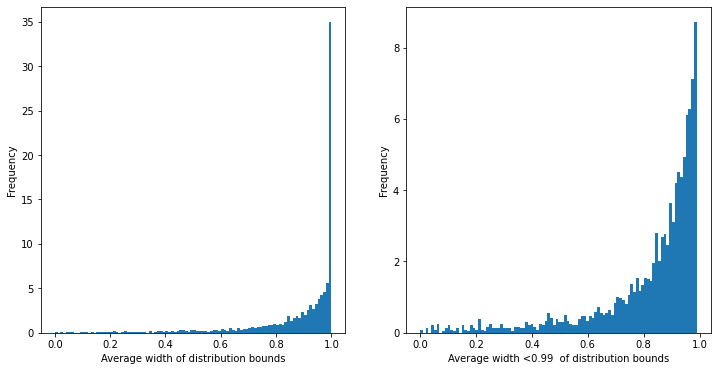

In [81]:
# average widths
avg_width = feasible_genes.apply(average_width, args=(0.5, False), axis='columns')
avg_width_cut = avg_width[avg_width < 0.99]
# histogram
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(avg_width, bins=100, density=True)
axs[0].set(xlabel="Average width of distribution bounds", ylabel="Frequency")
axs[1].hist(avg_width_cut, bins=100, density=True)
axs[1].set(xlabel="Average width <0.99 of distribution bounds", ylabel="Frequency")

# Dataset of categories

Given these categories and summary statistics of bounds can produce a dataset with rows corresponding to genes, storing all information. This allows direct comparison between transcript count samples for a gene, and the type of bounds derived, giving potential for analysis of what properties of data lead to different solution types:

In [22]:
# create dataframe
data_categories = pd.DataFrame()

# boolean: infeasible bounds
mask_infeasible = data.k1.apply(lambda x: 'infeasible' in x)
data_categories["infeasible"] = mask_infeasible

# boolean: zero lower bounds
mask_zero = data.apply(zero_lb, axis='columns')
data_categories["zero_lb"] = mask_zero

# boolean: monotone (increasing/decreasing) bounds
mask_dec = data.apply(monotone_ub, args=(True,), axis='columns')
mask_inc = data.apply(monotone_ub, args=(False,), axis='columns')
data_categories["decreasing_ub"] = mask_dec
data_categories["increasing_ub"] = mask_inc

# average width of rows
width = data.apply(average_width, args=(0.5,False,), axis='columns')
data_categories["average_width"] = width

In [64]:
data_categories.head()

,infeasible,zero_lb,decreasing_ub,increasing_ub,average_width
0,False,True,False,False,0.876741
1,False,True,False,False,0.975806
2,False,True,False,False,1.000000
3,True,NaN,NaN,NaN,NaN
4,False,True,False,False,0.890809


## Summary statistics combined

In [82]:
def summary_statistics(data):
    # boolean mask over k1 column: look for solution lists with infeasible in
    mask_infeasible = data.k1.apply(lambda x: 'infeasible' in x)
    # apply mask to select these rows
    infeasible_genes = data[mask_infeasible]
    # count number of genes
    inf_num = infeasible_genes.shape[0]
    inf_per = round(100 * inf_num / data.shape[0], 2)
    print(f"{inf_num} infeasible genes, {inf_per}% of the data.")

    # select feasible rows (~mask = logical not of mask)
    feasible_genes = data[~mask_infeasible]
    # count number of genes
    feas_num = feasible_genes.shape[0]
    feas_per = round(100 * feas_num / data.shape[0], 2)
    print(f"{feas_num} feasible genes, {feas_per}% of the data.")

    from ast import literal_eval

    def zero_lb(row):
        """Boolean indicator if all lower bounds ~ 0 (with a tolerance)"""
        # take mu_k columns: discard k0 and k1 columns
        row = row[2:]
        # loop over columns
        for bounds in row:
            # if not nan (not estimated)
            if pd.notnull(bounds):
                # convert string to list: take lower bound
                lb = literal_eval(bounds)[0]
                # if not None (infeasible, no bounds)
                if lb:
                    # if lb sufficiently large: return False (non-zero lb found)
                    if lb > 10**(-2):
                        return False
                # if None: infeasible, no bounds: question doesn't make sense
                else:
                    return np.nan
        # no sufficiently large lb: return True (all lb zero)
        return True

    # boolean mask of rows (of feasible genes)
    mask_zero = feasible_genes.apply(zero_lb, axis='columns')
    # apply mask
    zero_lb_genes = feasible_genes[mask_zero]
    # count number of genes
    zero_lb_num = zero_lb_genes.shape[0]
    zero_lb_per = round(100 * zero_lb_num / feas_num, 2)
    print(f"{zero_lb_num} genes with zero lower bounds, {zero_lb_per}% of the data.")
    # show
    zero_lb_genes.head()

    from ast import literal_eval

    def monotone_ub(row, decreasing=True):
        """
        Boolean indicator if upper bounds of dist. are montone (weakly)

        row: row of data containing lists of bounds on parameters + nan values
        decreasing:
            (True) return bool of whether upper bounds are weakly decreasing
            (False) return bool of whether upper bounds are weakly increasing
        """
        if decreasing:
            # arbitrary high value
            ub_prev = 10
        else:
            # arbitrarily low value
            ub_prev = -10
        # take mu_k columns: discard k0 and k1 columns
        row = row[2:]
        # loop over columns
        for bounds in row:
            # if not nan (not estimated)
            if pd.notnull(bounds):
                # convert string to list: take upper bound
                ub = literal_eval(bounds)[1]
                # if not None (infeasible, no bounds)
                if ub:
                    # decreasing ub: if ub > ub_prev, return False (not decreasing)
                    if ub > ub_prev and decreasing:
                        return False
                    # increasing ub: if ub < ub_prev, return False (not increasing)
                    elif ub < ub_prev and not decreasing:
                        return False
                    # otherwise, update ub_prev to new value
                    else:
                        ub_prev = ub
                # if None: infeasible, no bounds: question doesn't make sense
                else:
                    return np.nan
        # no problems found: return True
        return True

    # boolean mask of rows (of feasible genes)
    mask_dec = feasible_genes.apply(monotone_ub, args=(True,), axis='columns')
    mask_inc = feasible_genes.apply(monotone_ub, args=(False,), axis='columns')
    # apply mask
    dec_ub_genes = feasible_genes[mask_dec]
    inc_ub_genes = feasible_genes[mask_inc]
    # count number of genes
    dec_num = dec_ub_genes.shape[0]
    inc_num = inc_ub_genes.shape[0]
    dec_per = round(100 * dec_num / feas_num, 2)
    inc_per = round(100 * inc_num / feas_num, 2)
    print(f"{dec_num} genes with all decreasing upper bounds, {dec_per}% of the feasible data.")
    print(f"{inc_num} genes with all increasing upper bounds, {inc_per}% of the feasible data.")

    def average_width(row, threshold=0.5, bool=True):
        """
        Calculate average width of dist. interval bounds
        Return bool of average < threshold, or just average if bool = False
        """
        # take mu_k columns: discard k0 and k1 columns
        row = row[2:]
        widths = []
        # loop over columns
        for bounds in row:
            # if not nan (not estimated)
            if pd.notnull(bounds):
                # convert string to list: take upper bound
                bound = literal_eval(bounds)
                lb = bound[0]
                ub = bound[1]
                # if not None (infeasible, no bounds)
                if ub:
                    widths.append(ub - lb)
                # if None: infeasible, no bounds: question doesn't make sense
                else:
                    return np.nan
        avg = sum(widths) / len(widths)
        if bool:
            return avg < threshold
        else:
            return avg

    # boolean mask of rows (of feasible genes)
    threshold = 0.5
    mask_width = feasible_genes.apply(average_width, args=(threshold,), axis='columns')
    # apply mask
    tight_genes = feasible_genes[mask_width]
    # count number of genes
    tight_num = tight_genes.shape[0]
    tight_per = round(100 * tight_num / feas_num, 2)
    print(f"{tight_num} genes with average width < {threshold} , {tight_per}% of the feasible data.")

    # range of widths
    widths = [x/10 for x in range(0,12)]
    width_num = []
    # threshold based on each width
    for threshold in widths:
        mask_width = feasible_genes.apply(average_width, args=(threshold,), axis='columns')
        # apply mask
        tight_genes = feasible_genes[mask_width]
        # count number of genes
        tight_num = tight_genes.shape[0]
        tight_per = round(100 * tight_num / feas_num, 2)
        width_num.append(tight_per)
    # plot
    plt.step(widths, width_num)
    plt.title("Percentage of (feasible) genes with average solution width < threshold")
    plt.xlabel("Average width threshold")
    plt.ylabel("Percentage")
    plt.show()

    # average widths
    avg_width = feasible_genes.apply(average_width, args=(0.5, False), axis='columns')
    avg_width_cut = avg_width[avg_width < 0.99]
    # histogram
    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].hist(avg_width, bins=100, density=True)
    axs[0].set(xlabel="Average width of distribution bounds", ylabel="Frequency")
    axs[1].hist(avg_width_cut, bins=100, density=True)
    axs[1].set(xlabel="Average width <0.99 of distribution bounds", ylabel="Frequency")

168 infeasible genes, 4.34% of the data.
3707 feasible genes, 95.66% of the data.
3303 genes with zero lower bounds, 89.1% of the data.
198 genes with all decreasing upper bounds, 5.34% of the feasible data.
194 genes with all increasing upper bounds, 5.23% of the feasible data.
194 genes with average width < 0.5 , 5.23% of the feasible data.


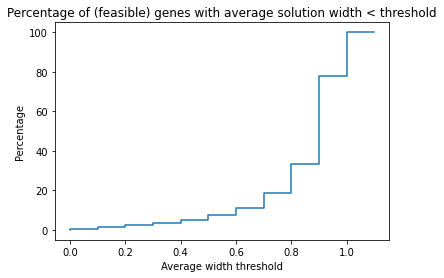

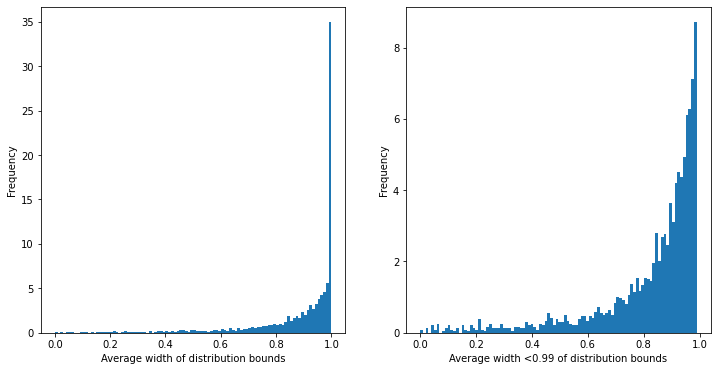

In [83]:
summary_statistics(data)